## Burgers Equation

$$ \frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x} + \nu \frac{\partial^2 u}{\partial x^2} $$

In [523]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft 

np.random.seed(0)

## Initial function which we will use

In [524]:
def initial_condition(x):
    return -np.sin(np.pi*x) + np.sin(3*np.pi*x) + 3*np.sin(5*np.pi*x) + 0.5*np.sin(7*np.pi*x)

#### Taking the initial conditions

In [525]:
Range_start = -1 #initial condition of where to start
Range_stop = 1 #Final point where we will stop
Range_length = Range_stop - Range_start # Will give the length of the condition
dx = 0.01 # Will define the minimum x difference
num_points = int(round(Range_length/dx) + 1) # Will give the mumber of points
x_range = np.linspace(Range_start,Range_stop,int(num_points)) # Will output the x values

nu = 0.1/np.pi # Defining the value of nu

In [526]:
num_points

201

In [527]:
test_value = fft.fft(x_range)

In [528]:
# plt.plot(test_value[0:10].imag)

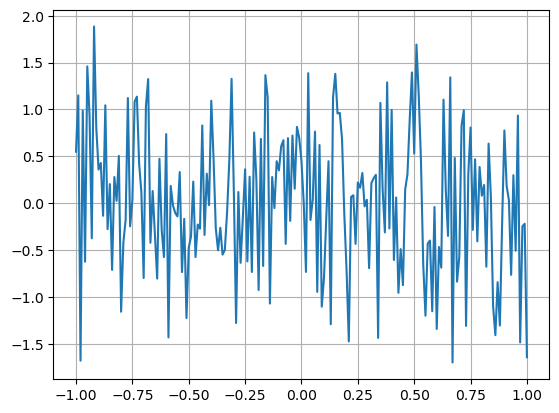

In [529]:
mean = 0
variance = np.random.random()
num_grfs = 1000
length = num_points
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, np.sqrt(variance), length)
window_size = 10
u_0 = s # np.convolve(s, np.ones(window_size)/window_size, mode='same') # initial_condition(x_range) # will give initial condition in the real space

# u_0 =   # initial_condition(x_range) # will give initial condition in the real space
plt.plot(x_range,u_0) # Plot for visualization

plt.grid()

##### Creating fft parameters

In [530]:
dt = 1e-2 # time step value
t_max = 1 # Maximum time range
num_t_points = int(round(t_max)/dt + 1) # Number of points
t_range = np.linspace(0,t_max,int(num_t_points))

In [531]:
kappa = 2*np.pi*fft.fftfreq(num_points,d=dx)
#u = fft.fft(u_0)
#plt.plot(kappa,u.real)
#plt.xlim([-10,10])

In [532]:
def du_dt(u,time_range,kappa,nu):
    u_hat = fft.fft(u)
    fourier_du_dx = 1j*kappa*u_hat
    fourier_du2_dx2 = -(kappa**2)*u_hat

    real_du_dt = fft.ifft(fourier_du_dx)
    real_du2_dx2 = fft.ifft(fourier_du2_dx2)

    return (-u*real_du_dt + nu*real_du2_dx2).real

In [533]:
Actual_data = np.zeros((num_points*num_t_points*num_grfs,num_points+3))
one_grf = num_points*num_t_points

In [534]:
Actual_data.shape

(20301000, 204)

In [535]:
# [u_0 , 0.2 , 0.3 , 1].shape
# np.array([u_0 , 0.2 , 0.3 , 1])
np.concatenate([u_0,np.array([0.2,0.3,1])])

array([ 5.49385609e-01,  1.15042874e+00, -1.68042172e+00,  9.87916398e-01,
       -6.24306396e-01,  1.45935841e+00,  9.37965273e-01, -3.74763196e-01,
        1.88553432e+00,  8.00686521e-01,  3.58787879e-01,  4.29038549e-01,
       -1.34519907e-01,  1.04470706e+00, -2.77415924e-01,  2.03872273e-01,
       -7.11745733e-01,  2.79234846e-01,  2.47722097e-02,  5.04177473e-01,
       -1.15826881e+00, -4.19820637e-01, -1.79389078e-01,  1.12189057e+00,
       -2.46735411e-01,  3.50887794e-02,  1.08362662e+00,  1.13717948e+00,
        4.19629815e-01,  1.10578488e-01, -7.98809351e-01,  1.03379304e+00,
        1.32420300e+00, -4.21909484e-01,  1.29929760e-01, -3.42633114e-01,
       -8.04382234e-01,  4.73928888e-01, -2.85855077e-01, -5.74699864e-01,
        7.37642365e-01, -1.43215576e+00,  1.84116331e-01, -2.31471532e-02,
       -1.03325029e-01, -1.41241664e-01,  3.32359420e-01, -7.35211309e-01,
       -1.67380499e-01, -1.22573826e+00, -4.73918993e-01, -3.55163528e-01,
        2.30664149e-01, -

In [536]:
for i in range(num_grfs):
    np.random.seed(i)
    variance = np.random.random()
    u_0 = np.random.normal(mean, np.sqrt(variance), length)
    u_record = odeint(du_dt,u_0,t_range,args=(kappa,nu))
    for j in range(num_t_points):
        for k in range(num_points):
            # loc = i*one_grf + j*num_points + k
            Actual_data[i*one_grf + j*num_points + k,:] = np.concatenate([u_0,np.array([x_range[k],t_range[j],u_record[j,k]])])
    

In [ ]:
import h5py

with h5py.File("Burgers_generalised_dataset_2.h5","w") as f:
    f.create_dataset("my_array",data=Actual_data, compression="gzip", compression_opts=3)

In [537]:
# u_record = odeint(du_dt,u_0,t_range,args=(kappa,nu))
# u_record[1,1]

In [538]:
# time_asked = int(round(1/dt -1))
# plt.plot(x_range,u_record[-1,:])
# plt.grid()

In [539]:
# u_record.shape

In [540]:
# print(num_t_points,num_points)

In [541]:
#U_value_stack = u_record.reshape(-1,1)
#x_range_stack = x_range.reshape(1,-1)
#x_range_stack = np.tile(x_range_stack,(num_t_points,1)).flatten().reshape(-1,1)
#time_range_stack = np.tile(t_range.reshape(-1,1),(1,num_points)).reshape(-1,1)
#u0_value_stack = np.tile(u_0.reshape(1,-1),(len(x_range_stack),1))

In [542]:
#Final_np_array = np.concatenate((u0_value_stack,x_range_stack,time_range_stack,U_value_stack),axis=1)
#Final_np_array.shape

In [543]:
#import pandas as pd

#Final_df = pd.DataFrame(Final_np_array)
#Final_df.head()

In [544]:
# Final_df.to_pickle("test_df.pkl")

In [545]:
# Final_df.to_csv("minus_sin_pix.csv")